In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Realistic_Car_Price_Challenge2.csv')
df.head()

,engine_displacement,mileage,car_age,repair_cost,fuel_efficiency,car_price,model_type,transmission_type,interior_color_code,vin_id
0,0.560919,-37.001103,-0.295480,-0.648457,1.598647,224.433954,1,42,-2.672283,405
1,-1.024388,-92.693047,-0.252568,0.099641,-3.241267,112.616070,1,42,4.022141,335
2,-2.650970,10.643023,1.091507,1.530725,1.503993,212.499200,1,42,-4.582153,209
3,-0.850520,-13.845598,-0.580523,-0.322368,-0.209023,378.052996,0,42,-5.453490,22
4,-0.322680,-75.679509,-0.250833,-0.574494,1.501334,91.640763,1,42,2.830546,678


In [4]:
df = df.drop(['vin_id', 'car_age'], axis=1)
df.head()

,engine_displacement,mileage,repair_cost,fuel_efficiency,car_price,model_type,transmission_type,interior_color_code
0,0.560919,-37.001103,-0.648457,1.598647,224.433954,1,42,-2.672283
1,-1.024388,-92.693047,0.099641,-3.241267,112.616070,1,42,4.022141
2,-2.650970,10.643023,1.530725,1.503993,212.499200,1,42,-4.582153
3,-0.850520,-13.845598,-0.322368,-0.209023,378.052996,0,42,-5.453490
4,-0.322680,-75.679509,-0.574494,1.501334,91.640763,1,42,2.830546


In [5]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [6]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    df = remove_outliers_iqr(df, column)

df.head()

,engine_displacement,mileage,repair_cost,fuel_efficiency,car_price,model_type,transmission_type,interior_color_code
0,0.560919,-37.001103,-0.648457,1.598647,224.433954,1,42,-2.672283
2,-2.650970,10.643023,1.530725,1.503993,212.499200,1,42,-4.582153
3,-0.850520,-13.845598,-0.322368,-0.209023,378.052996,0,42,-5.453490
4,-0.322680,-75.679509,-0.574494,1.501334,91.640763,1,42,2.830546
5,-0.623769,-103.990593,2.163846,-1.053416,342.944170,2,42,0.036153


In [7]:
X = df.drop('car_price', axis=1)
y = df['car_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test_scaled)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

R² Score: 0.3104


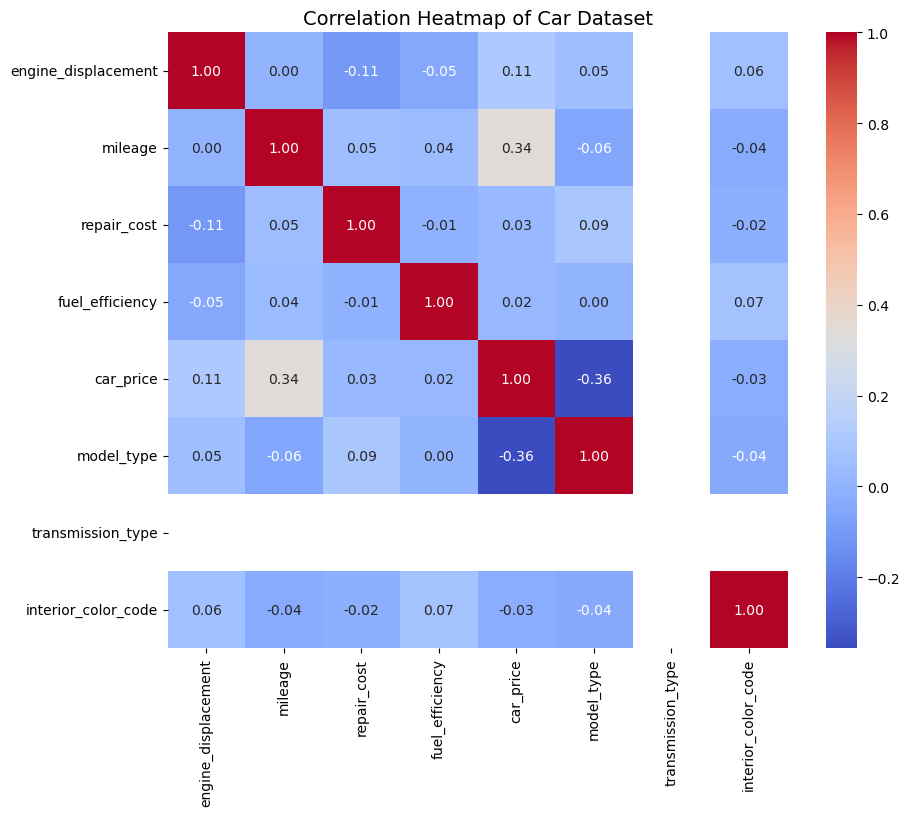

In [11]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Car Dataset", fontsize=14)
plt.show()